IMPORTANDO BIBLIOTECAS NECESSÁRIAS

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [15]:
# 1. Carregar os dados
data = pd.DataFrame({
    'Potência (kW)': [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    'Eficiência (%)': [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    'Idade (anos)': [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    'Tamanho (m²)': [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    'Consumo de Energia': ['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']
})


In [16]:
# 2. Codificar a variável de destino
data['Consumo de Energia'] = data['Consumo de Energia'].map({'Eficiente': 1, 'Ineficiente': 0})

# Separar características e variável alvo
X = data.drop('Consumo de Energia', axis=1)
y = data['Consumo de Energia']


In [17]:
# 3. Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# 4. Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# 5. Treinar o modelo SVM
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [20]:
# 6. Fazer previsões
y_pred = model.predict(X_test_scaled)


In [22]:
# 7. Avaliar o modelo
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[1 0]
 [0 2]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



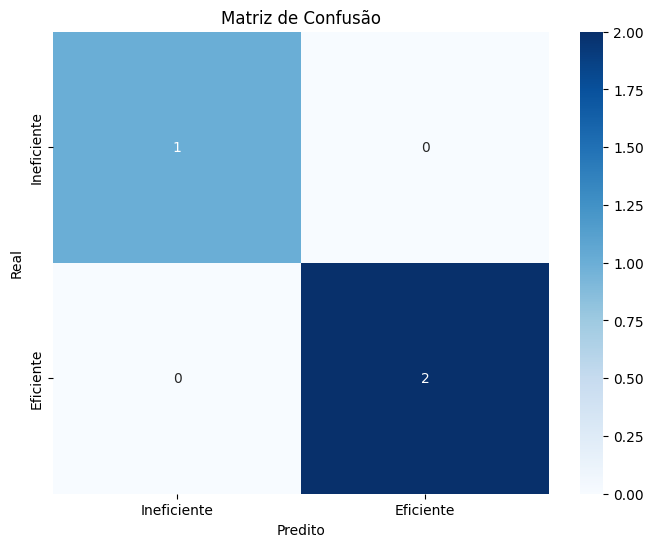

In [23]:
# 8. Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ineficiente', 'Eficiente'], yticklabels=['Ineficiente', 'Eficiente'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Explicação do Código
Carregar os Dados:

O DataFrame é criado diretamente no código para simplificação. Em um cenário real, você carregaria o CSV com pd.read_csv('seu_arquivo.csv').
Codificar a Variável de Destino:

A variável categórica "Consumo de Energia" é convertida para valores binários (1 e 0).
Separar Características e Variável Alvo:

Separa os dados em variáveis de características (X) e variável alvo (y).
Dividir os Dados:

Divide o conjunto de dados em treino e teste, usando 30% dos dados para teste.
Normalizar os Dados:

Normaliza os dados para que todos os recursos tenham a mesma escala.
Treinar o Modelo SVM:

Cria e treina um modelo SVM com um kernel RBF.
Fazer Previsões:

Usa o modelo treinado para fazer previsões no conjunto de teste.
Avaliar e Visualizar o Modelo:

Imprime a matriz de confusão e o relatório de classificação, e plota a matriz de confusão usando seaborn e matplotlib.